In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [65]:
df = pd.read_csv("./dataset/listings.csv")
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

In [66]:
columns = [
    "review_scores_value",
    "number_of_reviews",
    "review_scores_rating",
    "host_response_rate",
    "host_acceptance_rate",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "host_is_superhost",
   #  "host_since",
]


In [67]:
X = df[columns]
X = X.dropna()

In [68]:
X = X.sort_values(by=['host_is_superhost'])[-(946+946):]

In [69]:
X

,review_scores_value,number_of_reviews,review_scores_rating,host_response_rate,host_acceptance_rate,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,host_is_superhost
7601,10.0,7,100.0,1.00,1.00,10.0,10.0,10.0,f
7602,10.0,4,100.0,1.00,0.98,10.0,10.0,10.0,f
7683,10.0,3,100.0,0.90,1.00,10.0,10.0,10.0,f
7682,10.0,1,100.0,0.75,0.73,10.0,10.0,10.0,f
7681,10.0,1,100.0,1.00,0.33,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...
2021,10.0,114,99.0,1.00,0.78,10.0,10.0,10.0,t
5420,10.0,18,99.0,1.00,1.00,10.0,10.0,10.0,t
5419,10.0,7,100.0,0.67,1.00,10.0,10.0,10.0,t
5411,10.0,32,98.0,1.00,0.94,10.0,10.0,10.0,t


In [70]:

y = X["host_is_superhost"]
y = y.to_numpy()
tf = lambda t: 1 if t == 't' else 0;
y = np.array([tf(xi) for xi in y])

X = X.drop("host_is_superhost", axis=1)

In [71]:
y.sum()

946

In [72]:
X

,review_scores_value,number_of_reviews,review_scores_rating,host_response_rate,host_acceptance_rate,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin
7601,10.0,7,100.0,1.00,1.00,10.0,10.0,10.0
7602,10.0,4,100.0,1.00,0.98,10.0,10.0,10.0
7683,10.0,3,100.0,0.90,1.00,10.0,10.0,10.0
7682,10.0,1,100.0,0.75,0.73,10.0,10.0,10.0
7681,10.0,1,100.0,1.00,0.33,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...
2021,10.0,114,99.0,1.00,0.78,10.0,10.0,10.0
5420,10.0,18,99.0,1.00,1.00,10.0,10.0,10.0
5419,10.0,7,100.0,0.67,1.00,10.0,10.0,10.0
5411,10.0,32,98.0,1.00,0.94,10.0,10.0,10.0


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
Xpoly = PolynomialFeatures(2).fit_transform(X)
Xpoly_test = PolynomialFeatures(2).fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
modelLogReg = LogisticRegression(penalty='l1', solver='liblinear', C=4, max_iter=1000).fit(Xpoly, y)

Top left: True Negatives.   
Bottom left: False Negatives   

Top right: False Positives   
Bottom right: True Positives

In [81]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, modelLogReg.predict(Xpoly_test)))

[[154  57]
 [ 39 169]]


In [75]:
f = lambda x: 0 if x < 0.5 else 1
baselineYpred = [f(y) for y in np.random.rand(y.shape[0])]
cm = confusion_matrix(y, baselineYpred)
print(cm)

[[475 471]
 [468 478]]


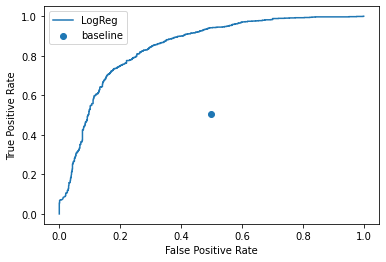

In [76]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y, modelLogReg.decision_function(X))
plt.plot(fpr, tpr, label="LogReg")

fpr = cm[0,1] / (cm[0,0]+ cm[0,1]) # false positive rate = FP/ TN + FP
tpr = cm[1,1] / (cm[1,1]+ cm[1,0]) # true positive rate = TP / TP + FN
plt.scatter(fpr, tpr, label="baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

/Users/ek/.pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


theta 0 : [0.]
theta 1 : [ 0.00000000e+00 -1.35018403e+00 -3.62872302e-01 -1.61529115e-01
  5.94160085e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.76320308e-01  1.20093283e-02 -3.62903599e-02
  3.32842485e-01  6.09644537e-01  0.00000000e+00  2.47291066e-01
 -2.10187383e-01 -7.04752993e-06  2.07492857e-03  3.56851768e-03
  1.75113023e-02  1.02104078e-02  1.24424227e-04 -6.46046924e-03
 -3.32780143e-03 -5.83175720e-02  2.02920879e-01  7.77363491e-02
  2.55479959e-02  1.82827158e-02  3.71179802e+00 -1.85549288e+00
  0.00000000e+00 -4.28933202e-01  0.00000000e+00 -3.66037366e+00
 -9.56974011e-01 -7.45082855e-01  0.00000000e+00 -1.90137247e-01
 -4.29085341e-01  9.39975101e-02  4.61094748e-02 -1.35763952e-02
 -1.90310465e-03]


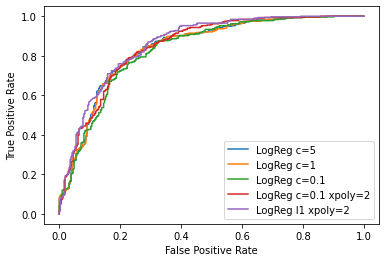

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

modelLogReg = LogisticRegression(penalty='l2', solver='lbfgs', C=5, max_iter=1000).fit(X, y)
fpr, tpr, _ = roc_curve(y_test, modelLogReg.decision_function(X_test))
plt.plot(fpr, tpr, label="LogReg c=5")

modelLogReg = LogisticRegression(penalty='l2', solver='lbfgs', C=1, max_iter=1000).fit(X, y)
fpr, tpr, _ = roc_curve(y_test, modelLogReg.decision_function(X_test))
plt.plot(fpr, tpr, label="LogReg c=1")

modelLogReg = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1, max_iter=1000).fit(X, y)
fpr, tpr, _ = roc_curve(y_test, modelLogReg.decision_function(X_test))
plt.plot(fpr, tpr, label="LogReg c=0.1")

Xpoly = PolynomialFeatures(2).fit_transform(X)
Xpoly_test = PolynomialFeatures(2).fit_transform(X_test)

modelLogReg = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1, max_iter=1000).fit(Xpoly, y)
fpr, tpr, _ = roc_curve(y_test, modelLogReg.decision_function(Xpoly_test))
plt.plot(fpr, tpr, label="LogReg c=0.1 xpoly=2")

modelLogReg = LogisticRegression(penalty='l1', solver='liblinear', C=4, max_iter=1000).fit(Xpoly, y)
fpr, tpr, _ = roc_curve(y_test, modelLogReg.decision_function(Xpoly_test))
plt.plot(fpr, tpr, label="LogReg l1 xpoly=2")

def printThetas(intercept ,coef):
    print("theta", 0, ":", intercept)
    for i in range(len(coef)):
        print("theta", i+1, ":", coef[i])

printThetas(modelLogReg.intercept_, modelLogReg.coef_)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [78]:
from sklearn.metrics import f1_score
y_pred = modelLogReg.predict(Xpoly_test)
f1_score(y_test,y_pred)

0.7952167414050823